In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels as sm
from statsmodels.regression.linear_model import OLS
from sklearn.metrics import r2_score



In [76]:
df = pd.read_csv('FX_USDJPY.csv')
df

,2017.01.02,2:00,116.858,116.87,116.858.1,116.87.1
0,2017.01.02,2:01,116.875,116.915,116.875,116.901
1,2017.01.02,2:02,116.901,116.901,116.901,116.901
2,2017.01.02,2:03,116.901,116.906,116.897,116.900
3,2017.01.02,2:04,116.900,116.903,116.900,116.903
4,2017.01.02,2:05,116.901,116.901,116.895,116.895
...,...,...,...,...,...,...
31436,2017.01.31,22:55,113.196,113.205,113.188,113.191
31437,2017.01.31,22:56,113.191,113.191,113.163,113.170
31438,2017.01.31,22:57,113.169,113.172,113.136,113.164
31439,2017.01.31,22:58,113.163,113.168,113.130,113.144


In [78]:
df.iloc[0] = df.columns


/var/folders/1q/jjlnxt5j4dg2mnmw35tf858m0000gn/T/ipykernel_5471/1567201635.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '116.858' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.iloc[0] = df.columns
/var/folders/1q/jjlnxt5j4dg2mnmw35tf858m0000gn/T/ipykernel_5471/1567201635.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '116.87' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.iloc[0] = df.columns
/var/folders/1q/jjlnxt5j4dg2mnmw35tf858m0000gn/T/ipykernel_5471/1567201635.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '116.858.1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.iloc[0] = df.colum

In [80]:
df.columns = ['Date','Time','Open','High','Low','Close']
df

,Date,Time,Open,High,Low,Close
0,2017.01.02,2:00,116.858,116.87,116.858.1,116.87.1
1,2017.01.02,2:02,116.901,116.901,116.901,116.901
2,2017.01.02,2:03,116.901,116.906,116.897,116.9
3,2017.01.02,2:04,116.9,116.903,116.9,116.903
4,2017.01.02,2:05,116.901,116.901,116.895,116.895
...,...,...,...,...,...,...
31436,2017.01.31,22:55,113.196,113.205,113.188,113.191
31437,2017.01.31,22:56,113.191,113.191,113.163,113.17
31438,2017.01.31,22:57,113.169,113.172,113.136,113.164
31439,2017.01.31,22:58,113.163,113.168,113.13,113.144


In [82]:
type(int(df['Time'][0].split(':')[0]))

int

In [84]:
df['Hour'] = list(map(lambda x: x.split(':')[0], df['Time']))

In [86]:
df['Hour'] = df['Hour'].astype(int)
df['Hour']

0         2
1         2
2         2
3         2
4         2
         ..
31436    22
31437    22
31438    22
31439    22
31440    22
Name: Hour, Length: 31441, dtype: int64

In [88]:
df['Close'][0] = str('116.871')
df['Close'][0]

/var/folders/1q/jjlnxt5j4dg2mnmw35tf858m0000gn/T/ipykernel_5471/1614574653.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Close'][0] = str('116.871')
/var/folders/1q/jjlnxt5j4dg2mnmw35tf858m0000gn/T/ipykernel_5471/1614574653.py:1: S

'116.871'

In [90]:
df['Close'] = df['Close'].astype(float)
df['Close']

0        116.871
1        116.901
2        116.900
3        116.903
4        116.895
          ...   
31436    113.191
31437    113.170
31438    113.164
31439    113.144
31440    113.148
Name: Close, Length: 31441, dtype: float64

In [92]:
df = df.groupby(['Date','Hour'])['Close'].mean()
df = df.reset_index().sort_values(by=['Date','Hour'], ascending=True)
df

,Date,Hour,Close
0,2017.01.02,2,116.999545
1,2017.01.02,3,117.325172
2,2017.01.02,4,117.401138
3,2017.01.02,5,117.403000
4,2017.01.02,6,117.356714
...,...,...,...
520,2017.01.31,18,112.720233
521,2017.01.31,19,112.926017
522,2017.01.31,20,112.995650
523,2017.01.31,21,113.042667


In [94]:
len(df)

525

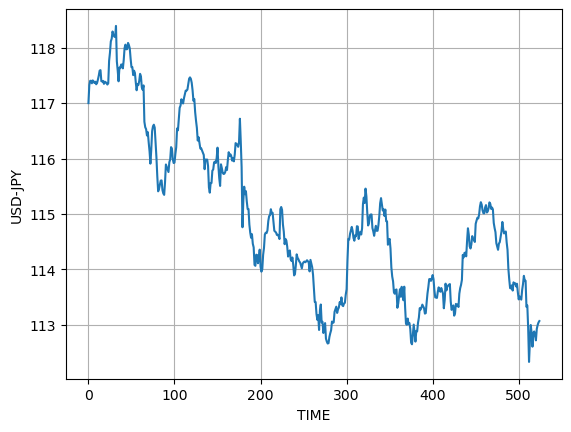

In [96]:
plt.plot(df['Close'])
plt.xlabel('TIME')
plt.ylabel('USD-JPY')
plt.grid('on')

In [98]:
# Feature engineering on this data:


In [100]:
for i in range(0,7):
    df['close_lag' + str(i)] = df['Close'].shift(i)
    

In [102]:
import talib

In [104]:
for n in [6,12,18,24]:
    df['ma_' + str(n)] = talib.SMA(df['Close'].values, timeperiod=n)/ df['Close']
    df['rsi' + str(n)] = talib.RSI(df['Close'].values, timeperiod=n)

df

,Date,Hour,Close,close_lag0,close_lag1,close_lag2,close_lag3,close_lag4,close_lag5,close_lag6,ma_6,rsi6,ma_12,rsi12,ma_18,rsi18,ma_24,rsi24
0,2017.01.02,2,116.999545,116.999545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017.01.02,3,117.325172,117.325172,116.999545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017.01.02,4,117.401138,117.401138,117.325172,116.999545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017.01.02,5,117.403000,117.403000,117.401138,117.325172,116.999545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017.01.02,6,117.356714,117.356714,117.403000,117.401138,117.325172,116.999545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,2017.01.31,18,112.720233,112.720233,112.809119,112.880683,112.856017,112.606067,112.853900,112.996633,1.000598,38.809412,1.001271,37.644794,1.003793,37.227382,1.004751,37.574286
521,2017.01.31,19,112.926017,112.926017,112.720233,112.809119,112.880683,112.856017,112.606067,112.853900,0.998881,50.604973,0.999153,43.743660,1.001704,41.643517,1.002638,41.092016
522,2017.01.31,20,112.995650,112.995650,112.926017,112.720233,112.809119,112.880683,112.856017,112.606067,0.998840,54.190690,0.998275,45.704037,1.000776,43.078282,1.001745,42.241246
523,2017.01.31,21,113.042667,113.042667,112.995650,112.926017,112.720233,112.809119,112.880683,112.856017,0.998700,56.735416,0.997934,47.062826,1.000019,44.061524,1.001128,43.024388


<Axes: >

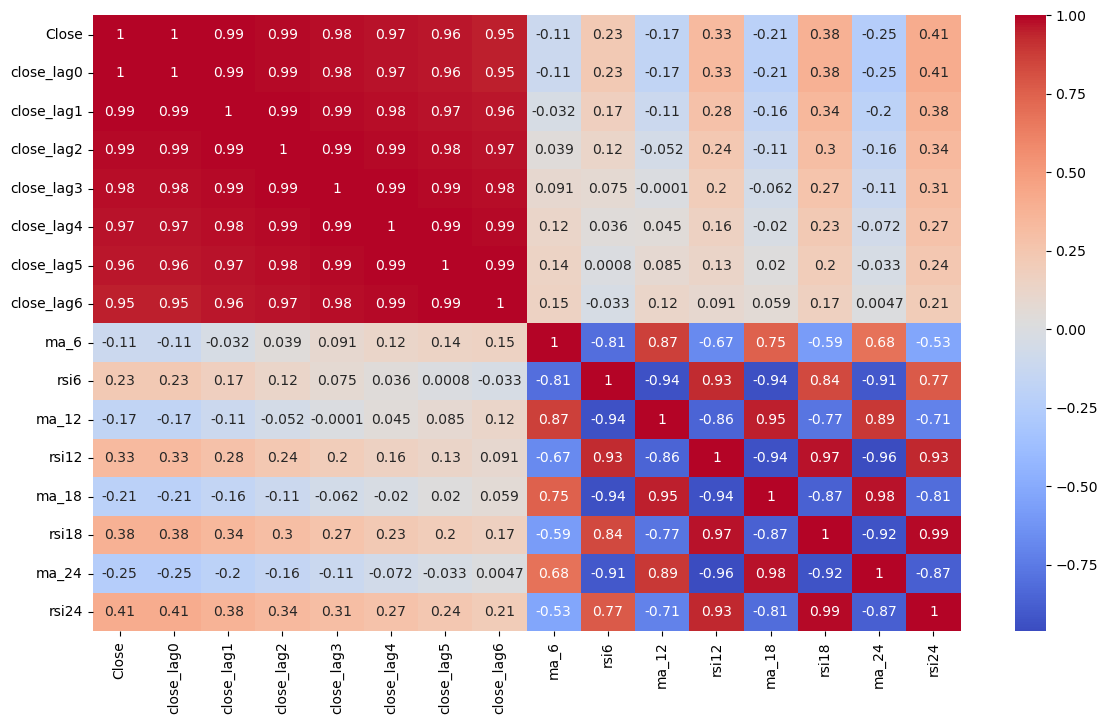

In [106]:
plt.figure(figsize = (14,8))
corr = df.drop(['Date','Hour'], axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [108]:
df.isna().sum()

Date           0
Hour           0
Close          0
close_lag0     0
close_lag1     1
close_lag2     2
close_lag3     3
close_lag4     4
close_lag5     5
close_lag6     6
ma_6           5
rsi6           6
ma_12         11
rsi12         12
ma_18         17
rsi18         18
ma_24         23
rsi24         24
dtype: int64

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        525 non-null    object 
 1   Hour        525 non-null    int64  
 2   Close       525 non-null    float64
 3   close_lag0  525 non-null    float64
 4   close_lag1  524 non-null    float64
 5   close_lag2  523 non-null    float64
 6   close_lag3  522 non-null    float64
 7   close_lag4  521 non-null    float64
 8   close_lag5  520 non-null    float64
 9   close_lag6  519 non-null    float64
 10  ma_6        520 non-null    float64
 11  rsi6        519 non-null    float64
 12  ma_12       514 non-null    float64
 13  rsi12       513 non-null    float64
 14  ma_18       508 non-null    float64
 15  rsi18       507 non-null    float64
 16  ma_24       502 non-null    float64
 17  rsi24       501 non-null    float64
dtypes: float64(16), int64(1), object(1)
memory usage: 74.0+ KB


In [112]:
from datetime import date
df['Date']

0      2017.01.02
1      2017.01.02
2      2017.01.02
3      2017.01.02
4      2017.01.02
          ...    
520    2017.01.31
521    2017.01.31
522    2017.01.31
523    2017.01.31
524    2017.01.31
Name: Date, Length: 525, dtype: object

In [114]:
df['Date'] = pd.to_datetime(df['Date'], format="%Y.%m.%d")
df['Date']

0     2017-01-02
1     2017-01-02
2     2017-01-02
3     2017-01-02
4     2017-01-02
         ...    
520   2017-01-31
521   2017-01-31
522   2017-01-31
523   2017-01-31
524   2017-01-31
Name: Date, Length: 525, dtype: datetime64[ns]

In [116]:
df.isna().sum()

Date           0
Hour           0
Close          0
close_lag0     0
close_lag1     1
close_lag2     2
close_lag3     3
close_lag4     4
close_lag5     5
close_lag6     6
ma_6           5
rsi6           6
ma_12         11
rsi12         12
ma_18         17
rsi18         18
ma_24         23
rsi24         24
dtype: int64

In [118]:
df=  df.fillna(df.mean())

In [120]:
df.isna().sum()

Date          0
Hour          0
Close         0
close_lag0    0
close_lag1    0
close_lag2    0
close_lag3    0
close_lag4    0
close_lag5    0
close_lag6    0
ma_6          0
rsi6          0
ma_12         0
rsi12         0
ma_18         0
rsi18         0
ma_24         0
rsi24         0
dtype: int64

In [122]:
q1 = df['Close'].quantile(0.25)
q3 = df['Close'].quantile(0.75)
iqr = q3-q1
iqr

2.2942999999999785

<Axes: ylabel='Close'>

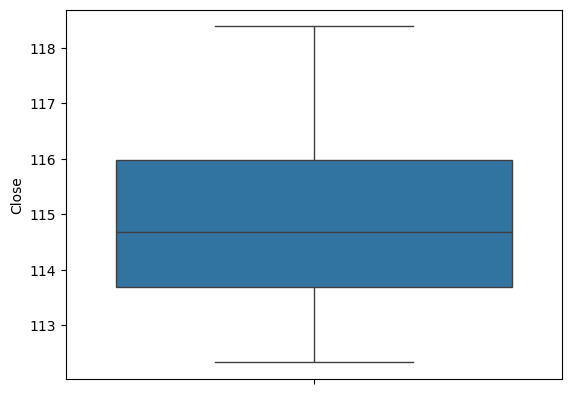

In [124]:
sns.boxplot(df['Close'])

In [126]:
from sklearn.model_selection import train_test_split

In [130]:
import sys
sys.setrecursionlimit(1500)
df_final = df.drop(['Date','Hour'], axis=1)
df_final

,Close,close_lag0,close_lag1,close_lag2,close_lag3,close_lag4,close_lag5,close_lag6,ma_6,rsi6,ma_12,rsi12,ma_18,rsi18,ma_24,rsi24
0,116.999545,116.999545,114.959877,114.963543,114.967313,114.971231,114.975560,114.979734,1.000184,48.968501,1.000420,48.273391,1.000670,47.958188,1.000896,47.788898
1,117.325172,117.325172,116.999545,114.963543,114.967313,114.971231,114.975560,114.979734,1.000184,48.968501,1.000420,48.273391,1.000670,47.958188,1.000896,47.788898
2,117.401138,117.401138,117.325172,116.999545,114.967313,114.971231,114.975560,114.979734,1.000184,48.968501,1.000420,48.273391,1.000670,47.958188,1.000896,47.788898
3,117.403000,117.403000,117.401138,117.325172,116.999545,114.971231,114.975560,114.979734,1.000184,48.968501,1.000420,48.273391,1.000670,47.958188,1.000896,47.788898
4,117.356714,117.356714,117.403000,117.401138,117.325172,116.999545,114.975560,114.979734,1.000184,48.968501,1.000420,48.273391,1.000670,47.958188,1.000896,47.788898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,112.720233,112.720233,112.809119,112.880683,112.856017,112.606067,112.853900,112.996633,1.000598,38.809412,1.001271,37.644794,1.003793,37.227382,1.004751,37.574286
521,112.926017,112.926017,112.720233,112.809119,112.880683,112.856017,112.606067,112.853900,0.998881,50.604973,0.999153,43.743660,1.001704,41.643517,1.002638,41.092016
522,112.995650,112.995650,112.926017,112.720233,112.809119,112.880683,112.856017,112.606067,0.998840,54.190690,0.998275,45.704037,1.000776,43.078282,1.001745,42.241246
523,113.042667,113.042667,112.995650,112.926017,112.720233,112.809119,112.880683,112.856017,0.998700,56.735416,0.997934,47.062826,1.000019,44.061524,1.001128,43.024388


In [ ]:
# Normalise the data:

In [138]:
df_n = df_final[['close_lag0', 'close_lag1', 'close_lag2', 'close_lag3',
       'close_lag4', 'close_lag5', 'close_lag6', 'ma_6', 'rsi6', 'ma_12',
       'rsi12', 'ma_18', 'rsi18', 'ma_24', 'rsi24']]
df_n = (df_n - df_n.mean())/df_n.std()

In [144]:
df_m = pd.concat([df_n, df_final.loc[:,'Close']], axis=1)
df_m

,close_lag0,close_lag1,close_lag2,close_lag3,close_lag4,close_lag5,close_lag6,ma_6,rsi6,ma_12,rsi12,ma_18,rsi18,ma_24,rsi24,Close
0,1.376690,0.000000,-9.605043e-15,0.000000,-9.638947e-15,-9.660501e-15,0.000000,0.000000,-3.217097e-16,0.000000,4.390782e-16,0.000000,0.000000,-4.916944e-14,0.000000,116.999545
1,1.596087,1.376393,-9.605043e-15,0.000000,-9.638947e-15,-9.660501e-15,0.000000,0.000000,-3.217097e-16,0.000000,4.390782e-16,0.000000,0.000000,-4.916944e-14,0.000000,117.325172
2,1.647270,1.596131,1.376124e+00,0.000000,-9.638947e-15,-9.660501e-15,0.000000,0.000000,-3.217097e-16,0.000000,4.390782e-16,0.000000,0.000000,-4.916944e-14,0.000000,117.401138
3,1.648525,1.647393,1.596213e+00,1.375905,-9.638947e-15,-9.660501e-15,0.000000,0.000000,-3.217097e-16,0.000000,4.390782e-16,0.000000,0.000000,-4.916944e-14,0.000000,117.403000
4,1.617339,1.648650,1.647558e+00,1.596367,1.375766e+00,-9.660501e-15,0.000000,0.000000,-3.217097e-16,0.000000,4.390782e-16,0.000000,0.000000,-4.916944e-14,0.000000,117.356714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,-1.506572,-1.451358,-1.407794e+00,-1.429434,-1.604245e+00,-1.442299e+00,-1.350911,0.214093,-4.599691e-01,0.284241,-6.567917e-01,0.827353,-0.828955,8.538351e-01,-0.941036,112.720233
521,-1.367922,-1.511339,-1.456164e+00,-1.412733,-1.434709e+00,-1.610775e+00,-1.448142,-0.674213,7.409391e-02,-0.423435,-2.799136e-01,0.273912,-0.487808,3.857418e-01,-0.616960,112.926017
522,-1.321005,-1.372474,-1.516241e+00,-1.461186,-1.417978e+00,-1.440860e+00,-1.616969,-0.695389,2.364430e-01,-0.716393,-1.587726e-01,0.027980,-0.376973,1.880289e-01,-0.511085,112.995650
523,-1.289327,-1.325485,-1.377153e+00,-1.521365,-1.466519e+00,-1.424091e+00,-1.446700,-0.767949,3.516596e-01,-0.830297,-7.480659e-02,-0.172509,-0.301017,5.142114e-02,-0.438937,113.042667


In [146]:
X=df_m.loc[:, df_m.columns !='Close']
y = df_m['Close']

In [148]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42,test_size=0.2)

In [150]:
from sklearn.linear_model import LinearRegression

In [151]:
lm = LinearRegression()

In [154]:
lm.fit(X_train,y_train)

LinearRegression()

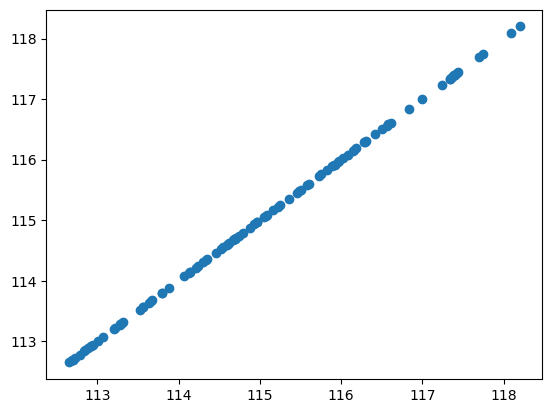

In [158]:
lm.predict(X_test)
plt.scatter(y_test,lm.predict(X_test))

In [164]:
mod = linear_reg(y_train, X_train, isSummary=True)


                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.958e+26
Date:                Sun, 23 Feb 2025   Prob (F-statistic):               0.00
Time:                        22:36:17   Log-Likelihood:                 11263.
No. Observations:                 420   AIC:                        -2.249e+04
Df Residuals:                     404   BIC:                        -2.243e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        114.9563   2.73e-14   4.21e+15      0.0

In [ ]:
# calculating the P-value and VIF 

In [166]:
def vif_cal(input_df):
    vif_df = pd.DataFrame(columns = [ 'Var', 'Vif']);
    i=0
    for var in input_df:
        y_vars = input_df[var]
        x_vars = input_df.drop(var, inplace=False, axis=1)
        r2s = OLS(y_vars, x_vars).fit().rsquared
        vif = round(1/(1-r2s),2)
        vif_df.loc[i] = [var,vif]
        i+=1
    return vif_df.sort_values(by = 'Vif', ascending = False, inplace = False)

In [168]:
vif_cal(X_train)


,Var,Vif
0,close_lag0,373.34
1,close_lag1,281.33
3,close_lag3,228.37
2,close_lag2,172.36
5,close_lag5,156.23
4,close_lag4,153.91
11,ma_18,96.32
6,close_lag6,84.04
12,rsi18,67.16
13,ma_24,58.34


In [172]:
X_t_1 = X_train.drop(columns=["close_lag0"],axis=1)
linear_reg(y_train,X_t_1,isSummary=True)


                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.080e+04
Date:                Sun, 23 Feb 2025   Prob (F-statistic):               0.00
Time:                        22:44:35   Log-Likelihood:                 485.60
No. Observations:                 420   AIC:                            -941.2
Df Residuals:                     405   BIC:                            -880.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        114.9521      0.004   3.03e+04      0.0

In [174]:
vif_cal(X_t_1)

,Var,Vif
2,close_lag3,195.21
1,close_lag2,164.33
4,close_lag5,152.71
3,close_lag4,150.98
0,close_lag1,97.47
10,ma_18,95.66
5,close_lag6,83.37
11,rsi18,67.15
12,ma_24,58.24
9,rsi12,43.31


In [178]:
X_t_2 = X_t_1.drop(columns=["close_lag1","close_lag2","close_lag4","close_lag5",'close_lag3'],axis=1)
linear_reg(y_train,X_t_2,isSummary=True)


                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     1242.
Date:                Sun, 23 Feb 2025   Prob (F-statistic):          3.19e-291
Time:                        22:46:04   Log-Likelihood:                -56.996
No. Observations:                 420   AIC:                             134.0
Df Residuals:                     410   BIC:                             174.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        114.9514      0.014   8374.196      0.0

In [180]:
vif_cal(X_t_2)


,Var,Vif
5,ma_18,93.09
6,rsi18,67.13
7,ma_24,57.89
4,rsi12,43.22
3,ma_12,34.68
8,rsi24,34.12
2,rsi6,21.62
1,ma_6,6.03
0,close_lag6,1.29


In [184]:
X_t_3 = X_t_2.drop(columns=["rsi24"],axis=1)
linear_reg(y_train,X_t_3,isSummary=True)


                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     1400.
Date:                Sun, 23 Feb 2025   Prob (F-statistic):          8.34e-293
Time:                        22:47:12   Log-Likelihood:                -57.007
No. Observations:                 420   AIC:                             132.0
Df Residuals:                     411   BIC:                             168.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        114.9514      0.014   8386.965      0.0

In [186]:
vif_cal(X_t_3)


,Var,Vif
5,ma_18,90.47
7,ma_24,56.88
4,rsi12,42.30
3,ma_12,34.20
2,rsi6,21.50
6,rsi18,19.62
1,ma_6,6.03
0,close_lag6,1.27


In [190]:
X_t_4 = X_t_3.drop(columns=["ma_18"],axis=1)
linear_reg(y_train,X_t_4,isSummary=True)


                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     1574.
Date:                Sun, 23 Feb 2025   Prob (F-statistic):          8.43e-293
Time:                        22:49:04   Log-Likelihood:                -60.818
No. Observations:                 420   AIC:                             137.6
Df Residuals:                     412   BIC:                             170.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        114.9509      0.014   8321.963      0.0

In [192]:
vif_cal(X_t_4)


,Var,Vif
4,rsi12,41.20
2,rsi6,20.88
5,rsi18,19.58
3,ma_12,16.25
6,ma_24,14.40
1,ma_6,5.47
0,close_lag6,1.27


In [196]:
X_t_5 = X_t_4.drop(columns=["rsi12"],axis=1)


In [200]:
linear_reg(y_train,X_t_5,isSummary=True)


                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     1841.
Date:                Sun, 23 Feb 2025   Prob (F-statistic):          1.89e-294
Time:                        22:49:38   Log-Likelihood:                -60.822
No. Observations:                 420   AIC:                             135.6
Df Residuals:                     413   BIC:                             163.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        114.9509      0.014   8338.914      0.0

In [202]:
vif_cal(X_t_5)


,Var,Vif
3,ma_12,16.13
5,ma_24,14.02
2,rsi6,10.37
4,rsi18,8.22
1,ma_6,5.31
0,close_lag6,1.26


In [206]:
X_t_6 = X_t_5.drop(columns=["rsi6"],axis=1)
linear_reg(y_train,X_t_6,isSummary=True)


                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     2215.
Date:                Sun, 23 Feb 2025   Prob (F-statistic):          3.84e-296
Time:                        22:58:24   Log-Likelihood:                -60.828
No. Observations:                 420   AIC:                             133.7
Df Residuals:                     414   BIC:                             157.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        114.9508      0.014   8353.238      0.0

In [208]:
vif_cal(X_t_6)


,Var,Vif
4,ma_24,13.75
2,ma_12,13.14
3,rsi18,7.88
1,ma_6,5.14
0,close_lag6,1.25


In [210]:
X_t_7 = X_t_6.drop(columns=["ma_6"],axis=1)


In [214]:
linear_reg(y_train,X_t_7,isSummary=True)


                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     2765.
Date:                Sun, 23 Feb 2025   Prob (F-statistic):          1.42e-297
Time:                        22:58:45   Log-Likelihood:                -61.565
No. Observations:                 420   AIC:                             133.1
Df Residuals:                     415   BIC:                             153.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        114.9509      0.014   8348.705      0.0

In [216]:
vif_cal(X_t_7)


,Var,Vif
3,ma_24,12.44
2,rsi18,7.84
1,ma_12,5.03
0,close_lag6,1.25


In [220]:
X_t_8 = X_t_7.drop(columns=["rsi18"],axis=1)
model = linear_reg(y_train,X_t_8,isSummary=True)
vif_cal(X_t_8)


                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     3682.
Date:                Sun, 23 Feb 2025   Prob (F-statistic):          4.38e-299
Time:                        22:59:15   Log-Likelihood:                -62.284
No. Observations:                 420   AIC:                             132.6
Df Residuals:                     416   BIC:                             148.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        114.9511      0.014   8345.055      0.0

,Var,Vif
1,ma_12,4.99
2,ma_24,4.96
0,close_lag6,1.06


In [224]:
X_test = sm.tools.tools.add_constant(X_test, has_constant='add')
y_test_p = mod.predict(X_test)
plt.figure(figsize=(16,10))
plt.plot(range(0,len(y_test)),y_test, label='Actual')
plt.plot(range(0,len(y_test)),y_test_p, label='Predicted')
plt.legend(loc='upper left')

ValueError: shapes (105,17) and (16,) not aligned: 17 (dim 1) != 16 (dim 0)